In [0]:
import numpy as np
import pandas as pd
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [0]:
%load_ext google.colab.data_table

In [0]:
def load_df(path, columns=None, use_threads=True, strings_to_categorical=True):
  """
  Load a parquet file and returns a pandas DataFrame
  """
  try:
    table = pq.read_table(path, columns=columns, use_threads=use_threads)
    return table.to_pandas(strings_to_categorical=strings_to_categorical)
  except Exception as e:
      print(e)


def save_df(df, path, compression='snappy', use_dictionary=True):
  """
  Save a pandas DataFrame to a parquet file
  """
  try:
    df.to_parquet(path, compression=compression,
                  use_dictionary=use_dictionary)
  except Exception as e:
    print(e)

def truncate(n, decimals=0):
    multiplier = 10 ** decimals
    return int(n * multiplier) / multiplier

In [0]:
df = load_df('random-forest-apps.parquet')

In [0]:
df = df[~df['name'].isin(['.dataservices'])]

In [0]:
df['usage'] = df['usage'].apply(lambda x: truncate(x, 2))
df['voltage'] = df['voltage'].apply(lambda x: x / 1000 if x > 1000 else x)
df['voltage'] = df['voltage'].apply(lambda x: truncate(x, 2))
df['temperature'] = df['temperature'].apply(lambda x: truncate(x, 2))

In [0]:
df = df[df['voltage'] > 0]
df = df[df['temperature'] > 0]

In [0]:
top = ['com.google.android.music',
 'com.facebook.orca',
 'com.facebook.katana',
 'com.whatsapp',
 'com.google.android.talk',
 'com.samsung.ucs.agent.boot',
 'com.lenovo.anyshare.gps',
 'com.android.chrome',
 'com.trustonic.tuiservice',
 'com.samsung.android.fmm',
 'org.simalliance.openmobileapi.eseterminal',
 'com.arkamys.audio',
 'com.ludashi.dualspace',
 'tv.peel.smartremote',
 'com.google.android.youtube',
 'com.secret.screenrecorder.screenshotrecord',
 'com.alibaba.aliexpresshd',
 'com.qualcomm.display',
 'com.mediatek.nlpservice',
 'com.snaptube.premium',
 'com.sec.android.easysidepanel',
 'ru.sberbankmobile',
 'com.sec.android.widgetapp.dualclockdigital',
 'com.google.android.marvin.talkback',
 'cm.aptoide.pt']

In [0]:
df = df[df['name'].isin(top[:10])]

In [0]:
df['ref'] = df['name'].astype('object')

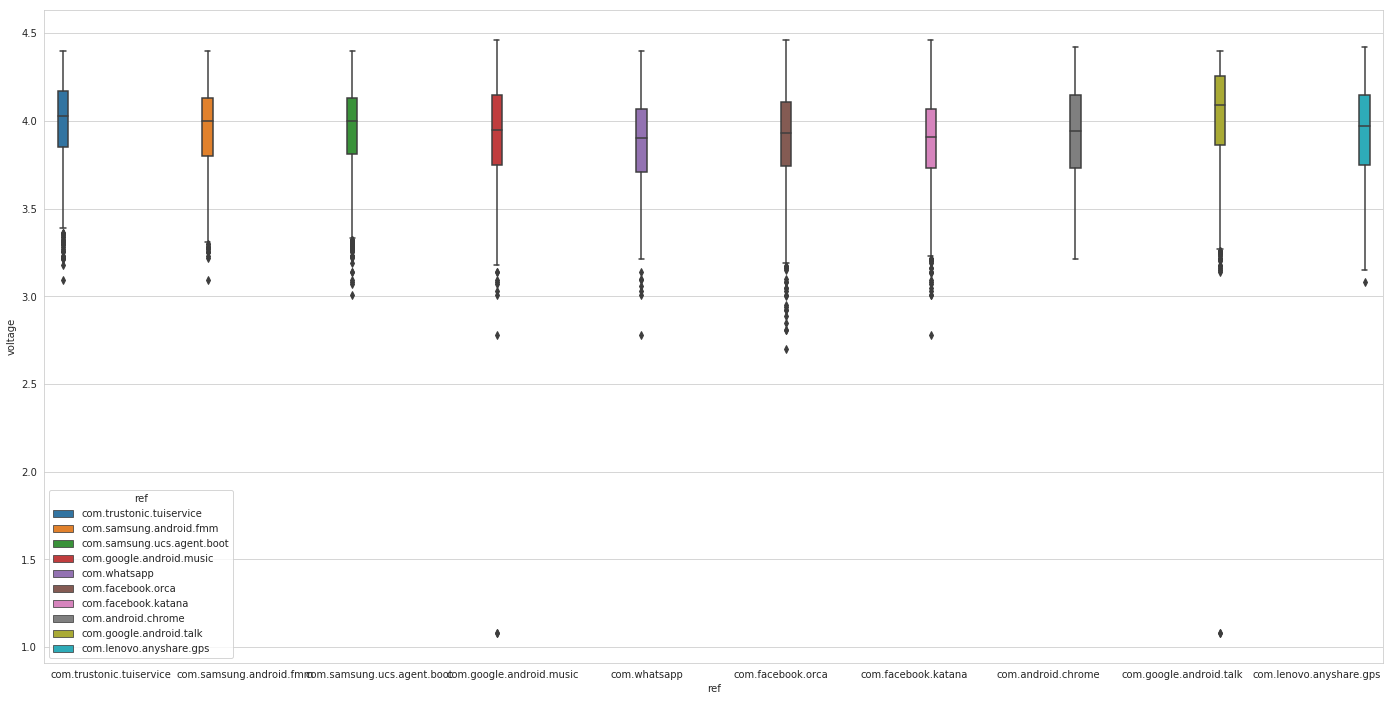

In [11]:
plt.figure(figsize=(24,12))
sns.boxplot(y='voltage', x='ref', data=df, hue='ref')

In [12]:
3.7 % 1000

3.7